In [2]:
import pandas as pd

In [3]:
from Bio import SeqIO

In [26]:
seq_file = "./sequences_m_1.fasta"

sequences = list(SeqIO.parse(seq_file, "fasta"))
print(f"Total Seqences: {len(sequences)}")

Total Seqences: 50


In [21]:
data = [];
for r in sequences:
    description = r.description
    # print(f"{description}\n\n")
    parts = description.split('|')
    row = {
        "Accession": parts[0].strip(),
        "Isolate Description": parts[1].strip(),
        "Collection Date": parts[2].strip(),
        "Authors": parts[3].strip(),
        "Institution": parts[4].strip(),
        "Country": parts[5].strip(),
        "Submission Date": parts[6].strip(),
        "Variant": parts[7].strip(),
        "BioSample ID": parts[12].strip(),
        "Project ID": parts[13].strip(),
        "Sequence": r.seq
    }
    data.append(row)
    # print(f"{row}\n\n")
df = pd.DataFrame(data)
df

,Accession,Isolate Description,Collection Date,Authors,Institution,Country,Submission Date,Variant,BioSample ID,Project ID,Sequence
0,OQ380380.1,Severe acute respiratory syndrome coronavirus ...,2023-01-18,"Howard,D., Batra,D., Cook,P.W., Caravas,J., Ra...","Centers for Disease Control and Prevention, Re...",USA,2023-02-04,BA.2,PRJNA716985,SAMN33061458,"(T, T, G, T, A, G, A, T, C, T, G, T, T, C, T, ..."
1,OQ382501.1,Severe acute respiratory syndrome coronavirus ...,2023-01-21,"Howard,D., Batra,D., Cook,P.W., Caravas,J., Ra...","Centers for Disease Control and Prevention, Re...",USA,2023-02-06,BQ.1,PRJNA716985,SAMN33094698,"(T, T, G, T, A, G, A, T, C, T, G, T, T, C, T, ..."
2,OQ472720.1,Severe acute respiratory syndrome coronavirus ...,2023-02-09,"Howard,D., Batra,D., Cook,P.W., Caravas,J., Ra...","Centers for Disease Control and Prevention, Re...",USA,2023-02-22,DT.2,PRJNA738869,SAMN33407114,"(C, G, G, C, T, G, C, A, T, G, C, T, T, A, G, ..."
3,OQ444589.1,Severe acute respiratory syndrome coronavirus ...,2023-01-29,"Howard,D., Batra,D., Cook,P.W., Caravas,J., Ra...","Centers for Disease Control and Prevention, Re...",USA,2023-02-16,BQ.1.1,PRJNA716985,SAMN33320682,"(T, T, G, T, A, G, A, T, C, T, G, T, T, C, T, ..."
4,OQ419471.1,Severe acute respiratory syndrome coronavirus ...,2023-01-21,"Howard,D., Batra,D., Cook,P.W., Caravas,J., Ra...","Centers for Disease Control and Prevention, Re...",USA,2023-02-10,BA.5.2.35,PRJNA716985,SAMN33236555,"(T, T, G, T, A, G, A, T, C, T, G, T, T, C, T, ..."
5,OQ419857.1,Severe acute respiratory syndrome coronavirus ...,2023-01-24,"Howard,D., Batra,D., Cook,P.W., Caravas,J., Ra...","Centers for Disease Control and Prevention, Re...",USA,2023-02-10,BF.13,PRJNA716985,SAMN33235903,"(T, T, G, T, A, G, A, T, C, T, G, T, T, C, T, ..."
6,OQ380360.1,Severe acute respiratory syndrome coronavirus ...,2023-01-18,"Howard,D., Batra,D., Cook,P.W., Caravas,J., Ra...","Centers for Disease Control and Prevention, Re...",USA,2023-02-04,BF.7,PRJNA716985,SAMN33061553,"(T, T, G, T, A, G, A, T, C, T, G, T, T, C, T, ..."
7,PP096080.1,Severe acute respiratory syndrome coronavirus ...,2023-12-20,"Howard,D., Batra,D., Cook,P.W., Caravas,J., Ra...","Centers for Disease Control and Prevention, Re...",USA,2024-01-09,JN.1,PRJNA716985,,"(T, T, G, T, A, G, A, T, C, T, G, T, T, C, T, ..."
8,OQ298705.1,Severe acute respiratory syndrome coronavirus ...,2023-01-03,"Howard,D., Batra,D., Cook,P.W., Caravas,J., Ra...","Centers for Disease Control and Prevention, Re...",USA,2023-01-20,BQ.1,PRJNA716985,SAMN32805692,"(T, T, G, T, A, G, A, T, C, T, G, T, T, C, T, ..."
9,OQ258781.1,Severe acute respiratory syndrome coronavirus ...,2023-01-05,"Howard,D., Batra,D., Cook,P.W., Caravas,J., Ra...","Centers for Disease Control and Prevention, Re...",USA,2023-01-17,BQ.1,PRJNA716984,SAMN32761676,"(C, T, T, T, T, G, A, T, C, T, C, T, T, G, T, ..."


In [50]:
from Bio.Align.Applications import ClustalOmegaCommandline
from Bio import AlignIO

In [55]:
clustalomega_cline = ClustalOmegaCommandline(
    infile="./sequences_m_1.fasta", 
    outfile="./align_result.fasta", 
    verbose=True,
    auto=True
)
stdout, stderr = clustalomega_cline()

In [89]:
aligned_result = AlignIO.read("./align_result.fasta", "fasta")

In [68]:
from Bio import Phylo

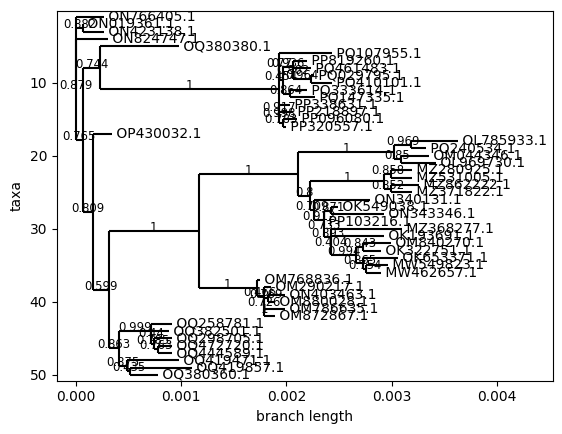

In [26]:
# Tree construntion done in Linux using 'fasttree' program which create the 'tree.nwk' file
tree = Phylo.read("./tree.nwk", "newick")
Phylo.draw(tree)

In [7]:
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor

In [94]:
distance_calculator = DistanceCalculator()
distance_matrix = distance_calculator.get_distance(aligned_result)
print(distance_matrix)

OQ380380.1  0.000000
OQ382501.1  0.002172    0.000000
OQ472720.1  0.003876    0.002105    0.000000
OQ444589.1  0.002139    0.000368    0.002005    0.000000
OQ419471.1  0.002239    0.001036    0.002740    0.001003    0.000000
OQ419857.1  0.002607    0.001337    0.003108    0.001370    0.001303    0.000000
OQ380360.1  0.002038    0.000835    0.002540    0.000802    0.000735    0.001036    0.000000
PP096080.1  0.003776    0.003308    0.004879    0.003342    0.003475    0.003743    0.003275    0.000000
OQ298705.1  0.002206    0.000368    0.002072    0.000334    0.001069    0.001370    0.000869    0.003342    0.000000
OQ258781.1  0.002874    0.001036    0.002807    0.001069    0.001671    0.002038    0.001537    0.003943    0.001069    0.000000
OP430032.1  0.001370    0.001170    0.002941    0.001203    0.001270    0.001571    0.001069    0.003175    0.001203    0.001871    0.000000
ON766405.1  0.001504    0.001337    0.003108    0.001370    0.001437    0.001738    0.001236    0.003242    0

In [ ]:
# Constructing tree by Neighbour Join function
constructor = DistanceTreeConstructor()
tree = constructor.nj(distance_matrix)
# Creating PhyloGenetic Tree ;c
Phylo.write(tree, "phylo_tree.newick", "newick")
Phylo.draw(tree)

In [72]:
# Root of the tree 
root = tree.root
print("Root:", root)
# No root exists

# Clade Node which is defined as a particular region in the Phylogenetic tree.
for clade in tree.find_clades():
    print(f"Clade: {clade.name}, Branch Length: {clade.branch_length}")

# Leaf Nodes
leaf_nodes = tree.get_terminals()
print("Leaf Nodes:", [leaf.name for leaf in leaf_nodes])


Root: Clade
Clade: None, Branch Length: None
Clade: ON766405.1, Branch Length: 0.000269286
Clade: None, Branch Length: 6.7e-05
Clade: ON019361.1, Branch Length: 6e-09
Clade: ON423138.1, Branch Length: 0.000202435
Clade: None, Branch Length: 5e-09
Clade: ON824747.1, Branch Length: 0.000303034
Clade: None, Branch Length: 6.2853e-05
Clade: None, Branch Length: 0.000169905
Clade: OQ380380.1, Branch Length: 0.000750011
Clade: None, Branch Length: 0.001697685
Clade: None, Branch Length: 5e-09
Clade: PQ107955.1, Branch Length: 0.000505521
Clade: None, Branch Length: 3.3548e-05
Clade: None, Branch Length: 0.00010064
Clade: PP819260.1, Branch Length: 0.000134739
Clade: None, Branch Length: 6e-09
Clade: PQ461483.1, Branch Length: 0.000168954
Clade: None, Branch Length: 0.000167751
Clade: PQ029795.1, Branch Length: 3.3659e-05
Clade: PQ410101.1, Branch Length: 0.000202193
Clade: None, Branch Length: 6.733e-05
Clade: PQ333614.1, Branch Length: 0.000168436
Clade: PQ147335.1, Branch Length: 0.0002360

In [49]:
# Find a clade
target_clade = tree.find_any('ON423138.1')
print("Target Clade:", target_clade)
print("Target Length:", target_clade.branch_length)

Target Clade: ON423138.1
Target Length: 0.000202435


In [71]:
# Searching for most distant clades
matching_clades = [clade.name for clade in tree.find_clades() 
                       if clade.branch_length and clade.branch_length > .0006]
# Showing only accession ID's
print(matching_clades)


['OQ380380.1', None, None, None, None, None, 'MZ368277.1']
